In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting

In [2]:
def load_dataset():
    file = ("2021.csv")
    df = pd.read_csv(file)
    return df

load_dataset()

,Google Cloud Region,Location,Google CFE,Grid carbon intensity (gCO2eq / kWh)
0,asia-east1,Taiwan,0.17,456
1,asia-east2,Hong Kong,0.28,360
2,asia-northeast1,Tokyo,0.16,464
3,asia-northeast2,Osaka,0.31,384
4,asia-northeast3,Seoul,0.31,425
5,asia-south1,Mumbai,0.10,670
6,asia-south2,Delhi,0.08,671
7,asia-southeast1,Singapore,0.04,372
8,asia-southeast2,Jakarta,0.13,580
9,australia-southeast1,Sydney,0.21,598


In [3]:
def print_summarize_dataset(df):
    print("Data Types:")
    print(df.dtypes)
    print()
    print("Statistical summary:")
    display(df.describe())
    
df = load_dataset()
print_summarize_dataset(df)

Data Types:
Google Cloud Region                      object
Location                                 object
Google CFE                              float64
Grid carbon intensity (gCO2eq / kWh)      int64
dtype: object

Statistical summary:


,Google CFE,Grid carbon intensity (gCO2eq / kWh)
count,31.000000,34.000000
mean,0.477419,316.323529
std,0.303984,189.701955
min,0.040000,0.000000
25%,0.210000,139.750000
50%,0.400000,309.000000
75%,0.735000,444.500000
max,1.000000,671.000000


# Data Exploration

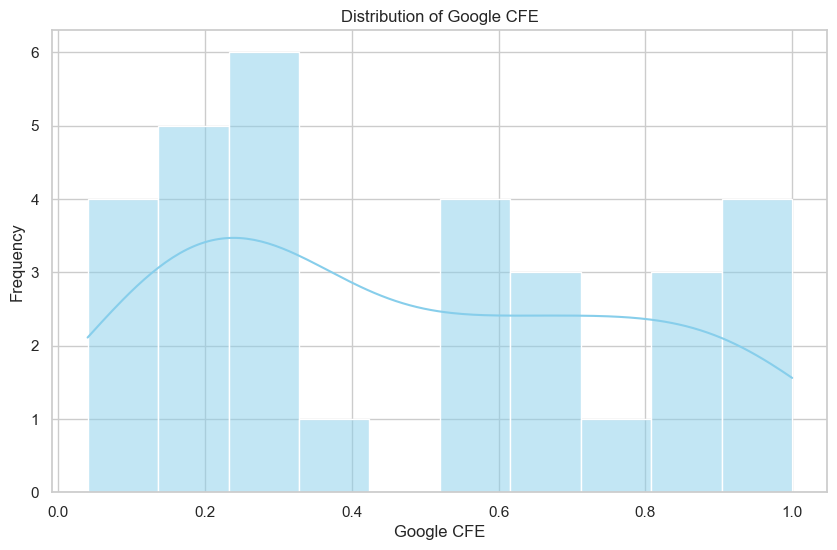

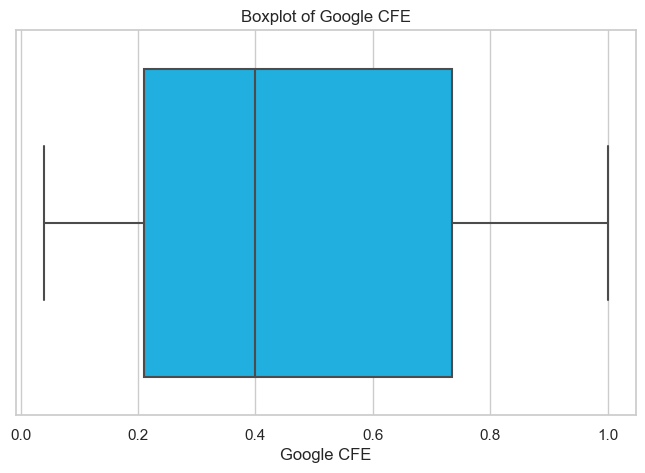

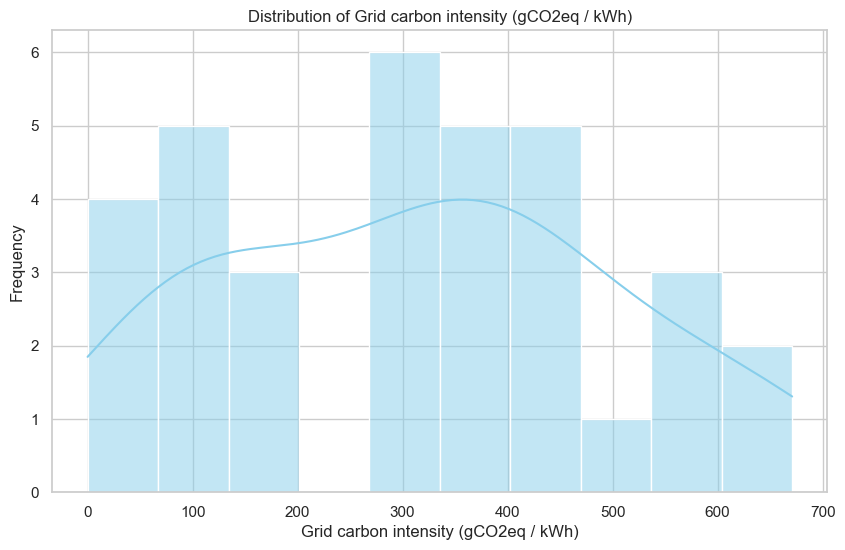

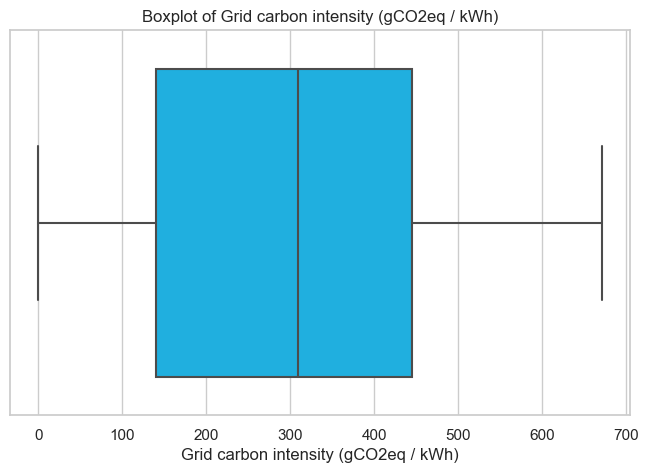

In [6]:
def print_histograms(df):
    columns = ['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)']
    sns.set(style="whitegrid", palette="pastel")
    
    for column in columns:
        #Histograms
        plt.figure(figsize=(10,6))
        sns.histplot(df[column], kde=True, color='skyblue', bins=10)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
        #Boxplot
        plt.figure(figsize=(8,5))
        sns.boxplot(x=df[column], color='deepskyblue')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()
        
print_histograms(df)

##### Conclusiones Comparativas con Años Anteriores:
##### Distribución Bimodal Persistente de Google CFE: Aunque hay variaciones en la forma de los picos en los histogramas, la bimodalidad sigue presente, lo que sugiere que las regiones aún están divididas en su adopción de energía libre de carbono.
##### Mejoras en Grid Carbon Intensity en 2021: Se observa una tendencia hacia intensidades de carbono más bajas en 2021, lo que podría sugerir un progreso hacia la sostenibilidad en algunas regiones. Sin embargo, la variabilidad sigue siendo un factor importante a tener en cuenta.

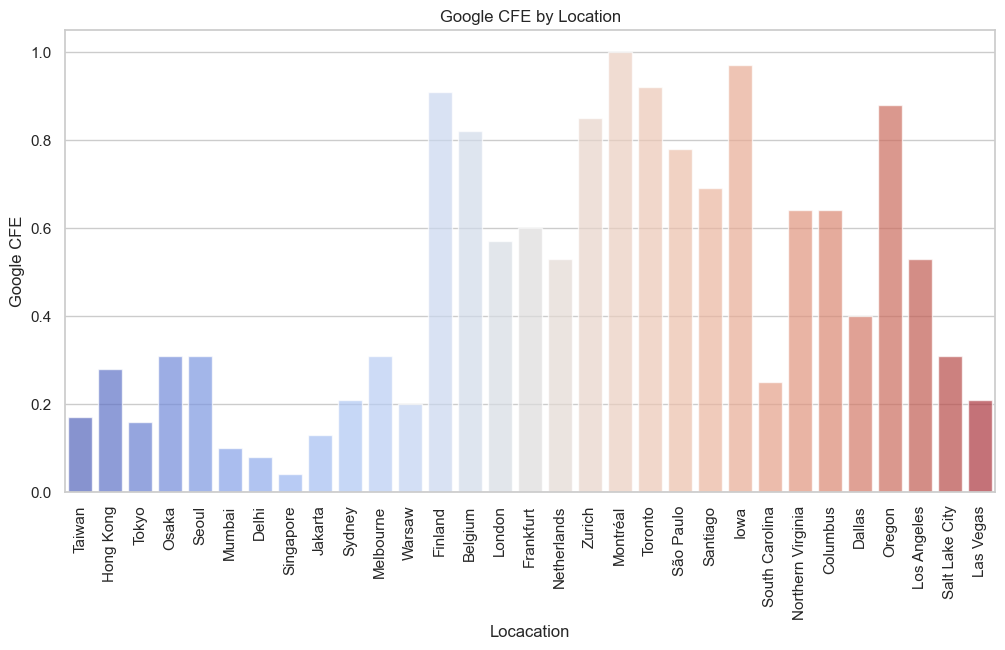

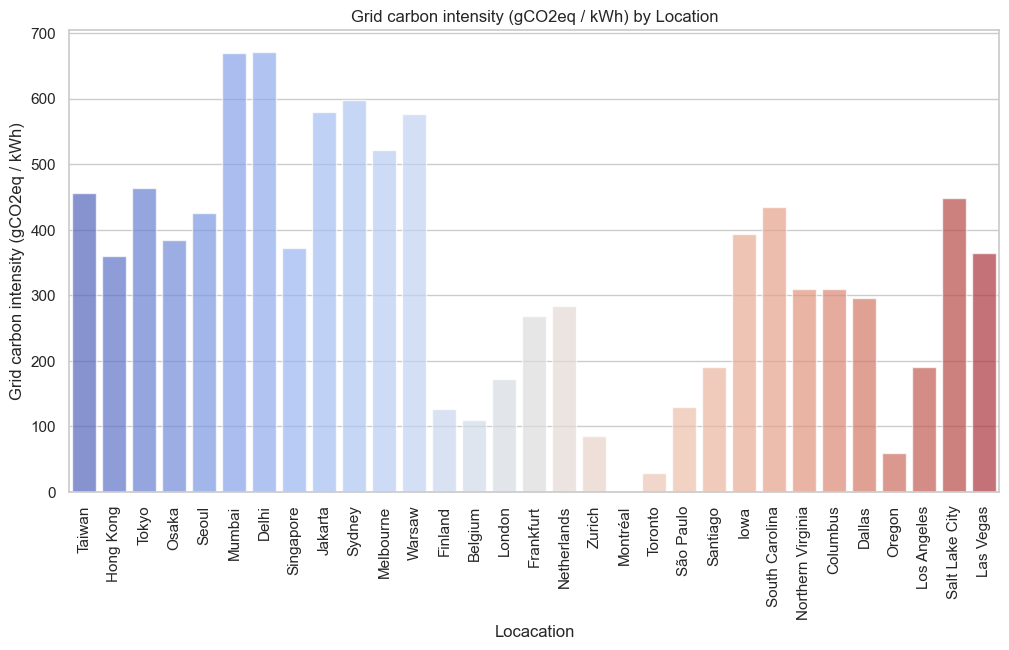

In [9]:
def bar_chart(df):
    df = df.dropna(subset=['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)'])
    
    columns = ['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)']
    
    for column in columns:
        plt.figure(figsize=(12,6))
        sns.barplot(x='Location', y=column, data=df, palette='coolwarm', alpha=0.7)
        plt.xticks(rotation=90)
        plt.title(f'{column} by Location')
        plt.xlabel('Locacation')
        plt.ylabel(column)
        plt.show()

bar_chart(df)

In [10]:
import folium
from folium.plugins import HeatMap

In [12]:
# Define a function to create a geographic heat map
def geographic_heat_map(df):
    # Dictionary of approximate coordinates for each Google Cloud region
    coordinates = {
        'asia-east1': (25.0330, 121.5654),  # Taiwan
        'asia-east2': (22.3193, 114.1694),  # Hong Kong
        'asia-northeast1': (35.6895, 139.6917),  # Tokyo
        'asia-northeast2': (34.6937, 135.5023),  # Osaka
        'asia-northeast3': (37.5665, 126.9780),  # Seoul
        'asia-south1': (19.0760, 72.8777),  # Mumbai
        'asia-southeast1': (1.3521, 103.8198),  # Singapore
        'asia-southeast2': (-6.2088, 106.8456),  # Jakarta
        'australia-southeast1': (-33.8688, 151.2093),  # Sydney
        'europe-north1': (60.1699, 24.9384),  # Finland
        'europe-west1': (50.8503, 4.3517),  # Belgium
        'europe-west2': (51.5074, -0.1278),  # London
        'europe-west3': (50.1109, 8.6821),  # Frankfurt
        'europe-west4': (52.3676, 4.9041),  # Netherlands
        'europe-west6': (47.3769, 8.5417),  # Zurich
        'northamerica-northeast1': (45.5017, -73.5673),  # Montreal
        'southamerica-east1': (-23.5505, -46.6333),  # Sao Paulo
        'us-central1': (41.8780, -93.0977),  # Iowa
        'us-east1': (33.8361, -81.1637),  # South Carolina
        'us-east4': (39.0438, -77.4874),  # Northern Virginia
        'us-west1': (45.5234, -122.6762),  # Oregon
        'us-west2': (34.0522, -118.2437),  # Los Angeles
        'us-west3': (40.7608, -111.8910),  # Salt Lake City
        'us-west4': (36.1699, -115.1398)   # Las Vegas
    }
    
    # Create a pandas DataFrame with the added coordinates
    df['Coordinates'] = df['Google Cloud Region'].map(coordinates)
    
    # Create a basemap centered on mean coordinates
    map_center = [20, 0] # Approximate center of the map
    m = folium.Map(location=map_center, zoom_start=2)
    
    # Create a list of data for the heat map
    heat_data = [[row['Coordinates'][0], row['Coordinates'][1], row['Grid carbon intensity (gCO2eq / kWh)']] 
                 for index, row in df.dropna(subset=['Coordinates', 'Grid carbon intensity (gCO2eq / kWh)']).iterrows()]
    
    # Add the HeatMap to the map
    HeatMap(heat_data, radius=15).add_to(m)
    
    return m

geographic_map = geographic_heat_map(df)
geographic_map.save("geographic_heat_map_2021.html") # Save the map as HTML file

In [13]:
def compute_correlations_matrix(df):
    columns = ['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)']
    correlations = df[columns].corr(method='pearson')
    return correlations

compute_correlations_matrix(df)

,Google CFE,Grid carbon intensity (gCO2eq / kWh)
Google CFE,1.000000,-0.850968
Grid carbon intensity (gCO2eq / kWh),-0.850968,1.000000
